# Introduction
Wikipedia defines Black Friday as an informal name for the Friday following Thanksgiving Day in the United States, which is celebrated on the fourth Thursday of November. [Black Friday is] regarded as the beginning of America's Christmas shopping season [...].


# 🛒 Analysis of Black Friday Shopping Trends via Machine Learning
In this project, we will try to explore different trends from the Black Friday shopping dataset. We will extract useful information that will answer questions such as: what gender shops more on Black Friday? Do the occupations of the people have any impact on sales? Which age group is the highest spender?

## 1. Problem definition

> we will create a simple machine learning algorithm that predicts the amount of money that a person is likely to spend on Black Friday depending on features such as gender, age, and occupation.

## 2. Data

The data is downloaded from the Kaggle: https://www.kaggle.com/sdolezel/black-friday

There are 2 main datasets:
* Train.csv is the training set.
* Test.csv is the test set.

## 3. Evaluation

The evaluation metric for this is not mentioned so, we can try diffrent algorithm which give better result for each scenario.As it's a regression problem we can use Random Forest Regressor or Linear Regression.

**Note:** This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

Problem: Predict purchase amount

## 4. Features

Here is a data dictionary detailing all of the features of the dataset.It shows which coloumn are going to be the influencers while prediction.You can view this on any internet explorer: https://miro.medium.com/max/875/1*8YLg2vwjt6NTjf7_mSoz4Q.png
* Age : should be treated as numerical. It presents age groups.
* City_Category: We can convert this to numerical as well, with dummy variables. Should take a look at the frequency of the values.
* Occupation : It seems like it has at least 16 different values, should see frequency and try to decrease this value.
* Gender: There are possibly two gender, we can make this binary.
* Product_ID: Should see if the string “P” means something and if there are other values.
* Stay_In_Current_City_Years: We should deal with the ‘+’ symbol.
* Product_Category_2 and Product_Category_3 : Have NaN values.
New variables to have in consideration:
* User_Count : There are duplicate User_ID , so it would be a good idea to create a feature with number of observations of the user
* Product_Count : Number of observations of the product

In [213]:
#Let’s start by importing some libraries and our data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings # never print matching warnings
warnings.filterwarnings("ignore",message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

print("All the libraries are loaded")

All the libraries are loaded


In [214]:
# Next, we need to import our data.('dataset' is the folder to store the data)
dtrain = pd.read_csv("dataset/train.csv")

## Data Analysis

In [215]:
#Let's see some basic information about our data!
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [216]:
# Let's see how the dataset looks like
dtrain.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [217]:
# Shape of our data
c = dtrain.shape
print("No. of Rows:-",c[0])
print("No. of Columns:-",c[1])

No. of Rows:- 550068
No. of Columns:- 12


In [218]:
# Now lets see the size and dimension of our dataframe
print("rows(elements) x columns(elements):-",dtrain.size)
print("Dimension:-",dtrain.ndim)

rows(elements) x columns(elements):- 6600816
Dimension:- 2


In [219]:
# The describe() function is used to generate descriptive statistics that summarize the central tendency,
#dispersion and shape of a dataset’s distribution, excluding NaN values.
dtrain.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [220]:
# Columns name
pd.DataFrame([dtrain.columns][0])

,0
0,User_ID
1,Product_ID
2,Gender
3,Age
4,Occupation
5,City_Category
6,Stay_In_Current_City_Years
7,Marital_Status
8,Product_Category_1
9,Product_Category_2


In [221]:
# Check for missing values percentage
dtrain.isna().sum()/dtrain.isnull().count()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

### Exploratory Data Analysis (Graphically) 📈¶

Text(0.5, 1.0, 'Purchase amount Distribution')

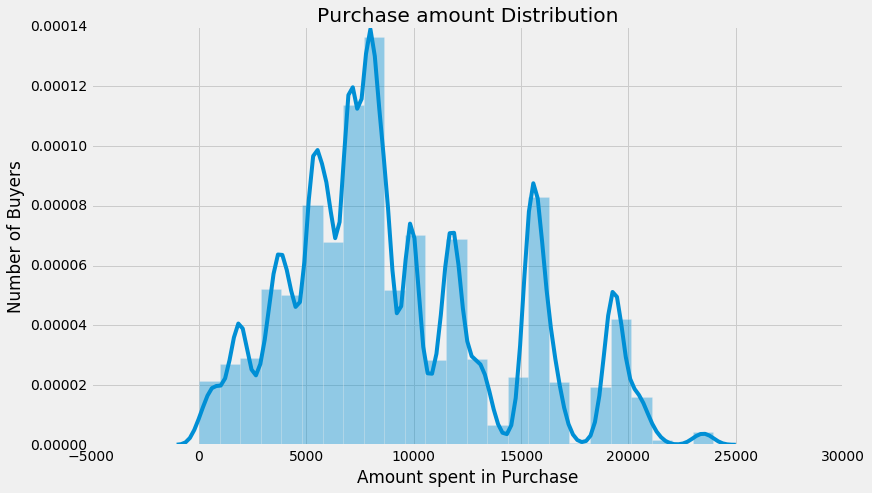

In [222]:
# Distribution of the target variable: Purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(dtrain.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

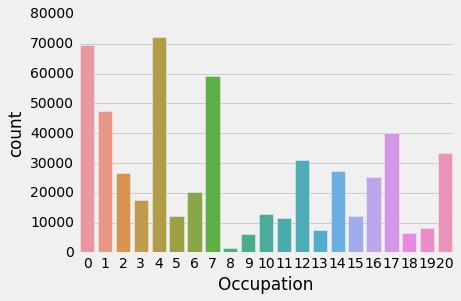

In [223]:
# Distribution of the variable Occupation
sns.countplot(dtrain.Occupation);

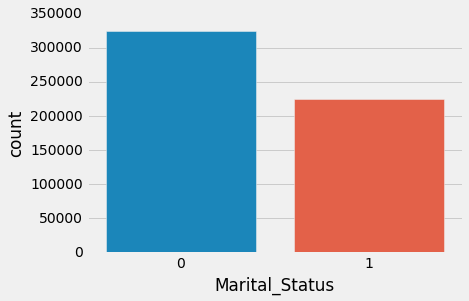

In [224]:
# Distribution of the variable Marital_Status
sns.countplot(dtrain["Marital_Status"]);


In [225]:
dtrain["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

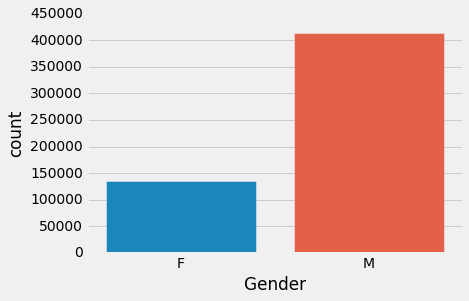

In [226]:
## Distribution of the variable Gender
sns.countplot(dtrain['Gender']);

In [227]:
dtrain["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

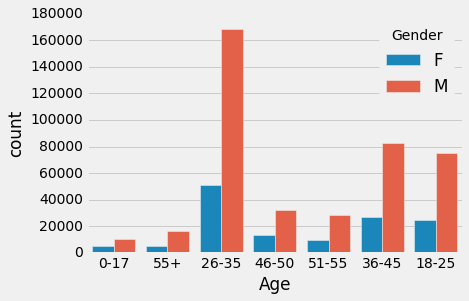

In [228]:
# plotting gender count w.r.t the age
sns.countplot(dtrain['Age'], hue=dtrain['Gender'])

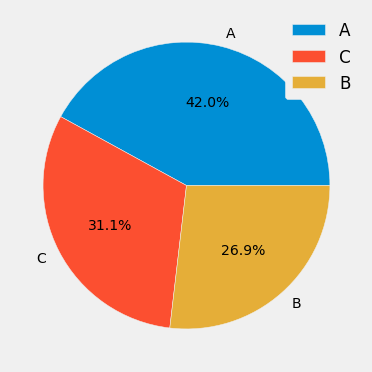

In [229]:
# Ratio of customers from each city
fig,ax = plt.subplots(figsize = (11,6))
ax.pie(dtrain["City_Category"].value_counts(),
       labels = dtrain["City_Category"].unique(),autopct='%1.1f%%')
plt.legend()
plt.show();

In [230]:
c = dtrain.City_Category.value_counts()
d = dtrain.City_Category.value_counts()/dtrain.City_Category.count()
l1 = []
l2 = []
for i in range(dtrain.City_Category.nunique()):
    l1 = c[i],d[i]
    l2.append(l1)
Citydf = pd.DataFrame(l2,columns=["No of City","City Percentage"],index=["A","C","B"])
Citydf

,No of City,City Percentage
A,231173,0.420263
C,171175,0.311189
B,147720,0.268549


In [231]:
# Make a Correlation Matrix
corr = dtrain.corr()
corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


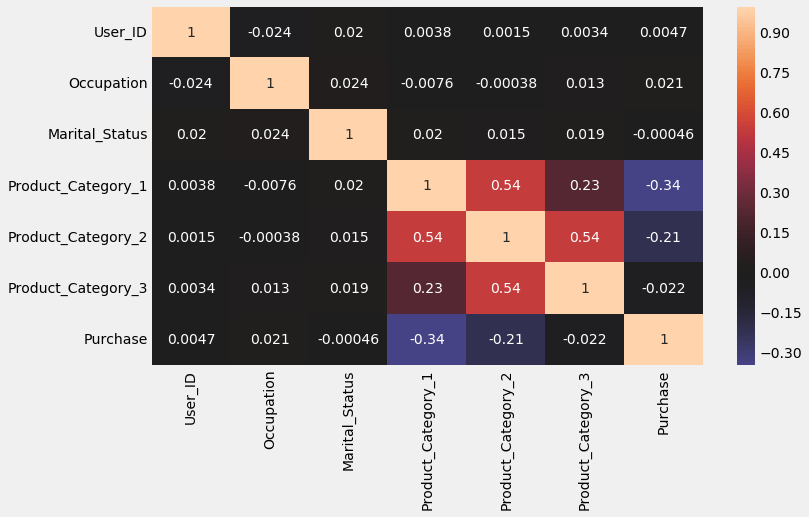

In [232]:
# lets Visualize the above Matrix using Heatmap
fig,ax = plt.subplots(figsize=(11,6))
sns.heatmap(corr,annot = True,center=0,linecolor="blue");

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [233]:
df_temp=dtrain.copy()

##  Data Pre-Processing

In [234]:
# Looking for missing values
df_temp.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [235]:
df_temp["Product_Category_3"].isna().value_counts()

True     383247
False    166821
Name: Product_Category_3, dtype: int64

**As we can see the missing values are quite high so we can remove these columns or if you dont want to remove them you can use the next column to add MEAN to them.**

**I will be removing the columns .So not going to use the next step**

**If you are using the next column then change the code accordingly ** 
* ie. comment out the deletion part

In [236]:
# Filling Product_Category_2 and Product_Category_3 with the mean values
df_temp["Product_Category_2"].fillna(df_temp["Product_Category_2"].mean(),inplace=True)
#df_temp["Product_Category_3"].fillna(df_temp["Product_Category_3"].mean(),inplace=True)

In [237]:
# Dropping the Category 3 data 
df_temp.drop(["Product_Category_3"],axis = 1,inplace = True)

In [238]:
# check the update data
df_temp.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [239]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


### Dropping columns that do not help in the prediction.
User_ID is is the number assigned automatically to each customer, and it is not useful for prediction purposes.

The Product_ID column contains information about the product purchased. It is not a feature of the customer. Therefore, we will remove that too.

In [240]:
df_temp = df_temp.drop(['User_ID','Product_ID'], axis=1)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


**we need to convert the categorical columns to numeric ones.**
* As Missingdata problem is over

In [245]:
# Find the columns which contain strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Gender
Age
City_Category
Stay_In_Current_City_Years


In [244]:
# This will turn all of the string value into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [246]:
# Turn categorical variables into numbers and fill missing
for label,content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_temp[label] = pd.Categorical(content).codes+1

In [247]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int8   
 1   Age                         550068 non-null  int8   
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int8   
 4   Stay_In_Current_City_Years  550068 non-null  int8   
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), int8(4)
memory usage: 23.1 MB


### Let's Model our Data Frame


In [249]:
X = df_temp.drop("Purchase",axis = 1)
y = df_temp["Purchase"]

In [273]:
%%time
# Split our data into test and train
# fit the model to the training data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=137,n_jobs=-1,
                              random_state=42,min_samples_leaf=2,
                             min_samples_split=20,max_features='auto',
                             max_depth=18,bootstrap=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
model.fit(X_train,y_train)

Wall time: 45.4 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=137, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

**As the Fitting of Data has been done.Now let's import the Training Data**

In [274]:
df_test = pd.read_csv("dataset/test.csv")

In [275]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Now we have to do all the thing we did for Training data to the Test Data so that our Machine can predict the Score

In [276]:
# Filling Product_Category_2  with the mean values
df_test["Product_Category_2"].fillna(df_test["Product_Category_2"].mean(),inplace=True)

# Dropping the Category 3 data 
df_test.drop(["Product_Category_3"],axis = 1,inplace = True)

# Dropping the User_ID,Product_ID
df_test = df_test.drop(['User_ID','Product_ID'], axis=1)

# This will turn all of the string value into category values
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()
        
# Turn categorical variables into numbers and fill missing
for label,content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_test[label] = pd.Categorical(content).codes+1


In [277]:
# let's score oor Model
model.score(X_test,y_test)

0.6598688112667874

In [278]:
#It is time to use the test data as inputs of the model to see how well our model performs.
predictions = model.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [ 6871.71594555  9603.65175294  4892.4131386  ...  2807.86908317
 13404.22560584  7457.25179664]


#### Performance Estimation of ML model

In [279]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))


MAE: 2176.842788382602
MSE: 8548154.370372623


In [280]:
# Lets Calculate Root Mean Square Value
def rmse(y_test,y_preds):
    
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(metrics.mean_squared_error(y_test,y_preds))
print("RMSE:",rmse(y_test,predictions))

RMSE: 2923.7226904021904


## Time for some HyperParameter Tuning
**RandomSearcCV**

In [308]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Differnet randomForestRegressor hyperparamenters
rf_grid = {"n_estimators": np.arange(1,1000,4),
          "max_depth" : [None,2,3,4,5,10],
          "min_samples_split" : np.arange(1,10,1),
          "min_samples_leaf" : np.arange(10,25,1),
          'max_features':[0.5,1,"sqrt","auto"],
           "bootstrap":[True,False]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                                   random_state = 42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv = 5,
                             verbose= True)
# Fit the RandomizedSearchCV
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 20.7min finished


Wall time: 25min 19s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [309]:
rs_model.score(X_test,y_test)

0.6596278700522269

In [313]:
from sklearn import metrics
#It is time to use the test data as inputs of the model to see how well our model performs.
predictions = rs_model.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

Predicted purchases (in dollars) for new costumers: [ 6438.60910025 10303.3997817   4941.29603374 ...  2831.48626855
 13533.68669785  7342.56502479]
MAE: 2172.9090333358167
MSE: 8554209.68892168


In [311]:
# Lets Calculate Root Mean Square Value
def rmse(y_test,y_preds):
    
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(metrics.mean_squared_error(y_test,y_preds))
print("RMSE:",rmse(y_test,predictions))

RMSE: 2924.7580564760706


In [314]:
rs_model.best_params_

{'n_estimators': 865,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

### Hyperparameter tuning using
**GridSearchCV**

In [317]:
grid_2 ={"n_estimators":[100,200,500],
       "max_depth":[None],
       "max_features":["auto","sqrt"],
        "min_samples_split":[6],
       "min_samples_leaf":[1,2]}

In [319]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

#Instantiate Randomclassifier
model = RandomForestRegressor()
#setup RandomSearchCV
gs_clf = GridSearchCV(estimator=model,
                           param_grid=grid_2,
                           cv = 5,
                           verbose=2)
#  Fit the RandamizedsearchCV version of clf
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total= 1.3min
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total= 1.3min
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total= 1.2min
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total= 1.2min
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total= 1.3min
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total= 2.6min
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total= 2.6min
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total= 2.6min
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total= 2.6min
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total= 2.6min
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total= 2.6min
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 191.3min finished


In [320]:
gs_clf.score(X_train,y_train)

0.7291087101894198

In [324]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [326]:
from sklearn import metrics
#It is time to use the test data as inputs of the model to see how well our model performs.
predictions = gs_clf.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

Predicted purchases (in dollars) for new costumers: [ 6793.56088543  9043.55313732  4856.1001479  ...  2774.85483132
 13872.22559262  7343.21487225]
MAE: 2179.963971558709
MSE: 8782480.060224548


In [327]:
# Let's Calculate the ROOT MEAN SQUARE ERROR
def rmse(y_test,y_preds):
    
    """
    Caculates root mean squared log error between predictions and
    true labels.
    
    """
    return np.sqrt(metrics.mean_squared_error(y_test,y_preds))
print("RMSE:",rmse(y_test,predictions))

RMSE: 2963.5249383503674
